# Database creation for the project

This ipynb outlines the steps used to create the database. 

The main database is from the [Kaggle Goodreads-books https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks). It is a comprehensive list of books listed in goodreads (which is a book community website). It is a good clean dataset of books, with over 10000 books in the csv file, suitable for the project uses. 

After inserting the books into the database, we further crawl one image for each of the books as the book cover. So we have some images. 

And then we create some user accounts. 

In [1]:
import pandas as pd
import os
import time

assert(os.path.exists("books.csv"))

## Read the dataframe and obtain isbn list

Read all values into string !! Otherwise the isbn 13 number "9780440000000" will become 9.78E+12. 

In [90]:
df = pd.read_csv("books.csv", sep=",", dtype=str)

# drop the last column as there are only 12 columns
df = df.iloc[:, :-1]

# print shape, total 11127 books
print(df.shape)

df.head(n=10)

(11127, 12)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9780440000000,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9780440000000,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9780440000000,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780440000000,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9780440000000,eng,2690,41428,164,9/13/2004,Scholastic
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,976540606,9780980000000,en-US,152,19,1,4/26/2005,Nimble Books
6,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,439827604,9780440000000,eng,3342,28242,808,9/12/2005,Scholastic
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,517226952,9780520000000,eng,815,3628,254,11/1/2005,Gramercy Books
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,345453743,9780350000000,eng,815,249558,4080,4/30/2002,Del Rey Books
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,1400052920,9781400000000,eng,215,4930,460,8/3/2004,Crown


In [91]:
# check each column data type
df.dtypes

bookID                object
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
  num_pages           object
ratings_count         object
text_reviews_count    object
publication_date      object
publisher             object
dtype: object

In [92]:
# check each column null values
df.isna().sum()

# no null values in the dataset

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [93]:
# only the isbn columns is very useful
isbn_list = df["isbn"].to_list()
print(isbn_list[:10])

['439785960', '439358078', '439554896', '043965548X', '439682584', '976540606', '439827604', '517226952', '345453743', '1400052920']


In [95]:
# the isbn number is always 10 characters long.
# so if it is less than 10 digits, append zero to it
for i in range(len(isbn_list)):
    isbn = isbn_list[i]

    if len(isbn) < 10:
        new_isbn = "{}{}".format("0" * (10 - len(isbn)), isbn)
        isbn_list[i] = new_isbn
    elif len(isbn) == 10:
        continue 
    else:
        print("error {}".format(isbn))

In [96]:
# display the isbn
print(isbn_list[:10])

['0439785960', '0439358078', '0439554896', '043965548X', '0439682584', '0976540606', '0439827604', '0517226952', '0345453743', '1400052920']


## Use google api to query the book based on isbn

The [google books library api https://developers.google.com/books/docs/v1/using](https://developers.google.com/books/docs/v1/using) provides more comprehensive info for the books. So we can query the api to get all data. 


In [55]:
import requests
import json 
import matplotlib.pyplot as plt
from PIL import Image

url = "https://www.googleapis.com/books/v1/volumes?q=isbn:{}"

In [56]:
# try one isbn
isbn = "043965548X"

# form the url
this_url = url.format(isbn)
print(this_url)

r = requests.get(this_url)
print(r.status_code)

data = r.json()

https://www.googleapis.com/books/v1/volumes?q=isbn:043965548X
200


In [57]:
# check the json
print(json.dumps(data, indent=2))

{
  "kind": "books#volumes",
  "totalItems": 1,
  "items": [
    {
      "kind": "books#volume",
      "id": "FBXRzgEACAAJ",
      "etag": "FZEZQK+OlSc",
      "selfLink": "https://www.googleapis.com/books/v1/volumes/FBXRzgEACAAJ",
      "volumeInfo": {
        "title": "Harry Potter and the Prisoner of Azkaban",
        "authors": [
          "J. K. Rowling"
        ],
        "publisher": "Scholastic Paperbacks",
        "publishedDate": "2004",
        "description": "During his third year at Hogwarts School for Witchcraft and Wizardry, Harry Potter must confront the devious and dangerous wizard responsible for his parents' deaths.",
        "industryIdentifiers": [
          {
            "type": "ISBN_10",
            "identifier": "043965548X"
          },
          {
            "type": "ISBN_13",
            "identifier": "9780439655484"
          }
        ],
        "readingModes": {
          "text": false,
          "image": false
        },
        "pageCount": 547,
      

In [58]:
# so we can extract the info from the data
book = data["items"][0]

# book title, author(s), publisher, publication date, category
title = book["volumeInfo"]["title"]
author_list = book["volumeInfo"]["authors"]
publisher = book["volumeInfo"]["publisher"]
year = book["volumeInfo"]["publishedDate"]
description = book["volumeInfo"]["description"]

pageCount = book["volumeInfo"]["pageCount"]
categories = book["volumeInfo"]["categories"]

image_link = book["volumeInfo"]["imageLinks"]["thumbnail"]
language = book["volumeInfo"]["language"]

print("title = {}".format(title))
print("author_list = {}".format(author_list))
print("publisher = {}".format(publisher))
print("year = {}".format(year))
print("description = {}".format(description))
print("pageCount = {}".format(pageCount))
print("categories = {}".format(categories))
print("image_link = {}".format(image_link))
print("language = {}".format(language))

title = Harry Potter and the Prisoner of Azkaban
author_list = ['J. K. Rowling']
publisher = Scholastic Paperbacks
year = 2004
description = During his third year at Hogwarts School for Witchcraft and Wizardry, Harry Potter must confront the devious and dangerous wizard responsible for his parents' deaths.
pageCount = 547
categories = ['Juvenile Fiction']
image_link = http://books.google.com/books/content?id=FBXRzgEACAAJ&printsec=frontcover&img=1&zoom=1&source=gbs_api
language = en


In [59]:
# get this image, and display
# https://stackoverflow.com/questions/30229231/python-save-image-from-url 

rr = requests.get(image_link)
if rr.status_code == 200:
    with open("trial_image.png", 'wb') as f:
        bytes = rr.content 
        f.write(bytes)

(128, 210)


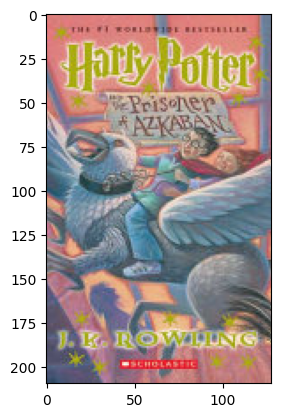

In [60]:
# display that image
img = Image.open("trial_image.png")
print(img.size)
plt.imshow(img)

In [61]:
# try with another book
isbn = "1595962808"

# form the url
this_url = url.format(isbn)
print(this_url)

r = requests.get(this_url)
print(r.status_code)

data = r.json()
print(json.dumps(data, indent=2))

https://www.googleapis.com/books/v1/volumes?q=isbn:1595962808
200
{
  "kind": "books#volumes",
  "totalItems": 1,
  "items": [
    {
      "kind": "books#volume",
      "id": "TpEoAQAACAAJ",
      "etag": "N6L1a9zenDk",
      "selfLink": "https://www.googleapis.com/books/v1/volumes/TpEoAQAACAAJ",
      "volumeInfo": {
        "title": "A Changeling for All Seasons",
        "authors": [
          "Angela Knight",
          "Kate Douglas",
          "Shelby Morgen"
        ],
        "publisher": "Changeling PressLlc",
        "publishedDate": "2005-10-01",
        "description": "A Changeling For All Seasons Ten unforgettable Erotic Tales to warm your nights and keep you in holiday spirits all year long! Angela Knight - A Vampire Christmas Sahara Kelly - A Christmas Pageant Judy Mays - Jingle Balls Marteeka Karland - Sealed With A Kiss Kate Douglas - My Valentine Shelby Morgen - Changeling Willa Okati - Elven Enchantment Kate Hill - Jolene's Pooka Lacey Savage - Chemistry to Burn Shelb

In [62]:
book = data["items"][0]

# book title, author(s), publisher, publication date, category
title = book["volumeInfo"]["title"]
author_list = book["volumeInfo"]["authors"]
publisher = book["volumeInfo"]["publisher"]
year = book["volumeInfo"]["publishedDate"]
description = book["volumeInfo"]["description"]

pageCount = book["volumeInfo"]["pageCount"]
categories = book["volumeInfo"]["categories"]

image_link = book["volumeInfo"]["imageLinks"]["thumbnail"]
language = book["volumeInfo"]["language"]

print("title = {}".format(title))
print("author_list = {}".format(author_list))
print("publisher = {}".format(publisher))
print("year = {}".format(year))
print("description = {}".format(description))
print("pageCount = {}".format(pageCount))
print("categories = {}".format(categories))
print("image_link = {}".format(image_link))
print("language = {}".format(language))

title = A Changeling for All Seasons
author_list = ['Angela Knight', 'Kate Douglas', 'Shelby Morgen']
publisher = Changeling PressLlc
year = 2005-10-01
description = A Changeling For All Seasons Ten unforgettable Erotic Tales to warm your nights and keep you in holiday spirits all year long! Angela Knight - A Vampire Christmas Sahara Kelly - A Christmas Pageant Judy Mays - Jingle Balls Marteeka Karland - Sealed With A Kiss Kate Douglas - My Valentine Shelby Morgen - Changeling Willa Okati - Elven Enchantment Kate Hill - Jolene's Pooka Lacey Savage - Chemistry to Burn Shelby Morgen - Troll Under The Bridge Filled with the unexpected, A Changeling For All Seasons offers something to savor for every palate. From humorous to magical, from Christmas to St. Patrick's Day to the 4th of July, these stories are alight with unbridled lust, sensuous passion, and hot, hot sex, guaranteed to entangle your senses and leave you breathless. www.ChangelingPress.com A Vacation For Your Mind -- No Passpo

(128, 198)


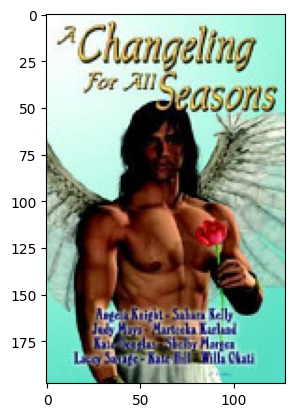

In [63]:
rr = requests.get(image_link)
if rr.status_code == 200:
    with open("trial_image_2.png", 'wb') as f:
        bytes = rr.content 
        f.write(bytes)

img = Image.open("trial_image_2.png")
print(img.size)
plt.imshow(img)

https://images.isbndb.com/covers/24/72/9780446692472.jpg
(309, 500)


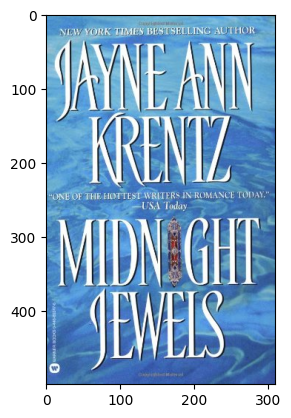

In [73]:
# but sometimes the google api does not have that book,
# so we use the ISBN search to find the book
# need isbn_13
isbn_13 = "9780446692472"

# the url format is like: https://images.isbndb.com/covers/24/72/9780446692472.jpg
# 24 and 72 are the last two sets of integers,
# then followed by the isbn 13 numbers, and jpg as the suffix
url = "https://images.isbndb.com/covers/{}/{}/{}.jpg"

this_url = url.format(isbn_13[9:11], isbn_13[11:13], isbn_13)
print(this_url)

r = requests.get(this_url, stream=True)

if r.status_code == 200:
    with open("trial_image_3.png", 'wb') as f:
        bytes = r.content 
        f.write(bytes)

img = Image.open("trial_image_3.png")
print(img.size)
plt.imshow(img)

So the following code block query the google books api to look for the book info. 

And if the book thumbnail exists, it downloads the image. 

There are many books not found on this library, which is reasonable since it may not hold all books. 

And when the book exist, it is possible that it does not contain the thumbnail image link. 

So after this code block, we will look into the missing images, and download from the isbn database. 

We plan to store about 6000 - 7000 books in the database. 

In [ ]:
# use the requests, to download all data into json file
# save the file into "raw_data" folder
raw_data_path = "raw_data"
if not os.path.exists(raw_data_path):
    os.makedirs(raw_data_path)

url = "https://www.googleapis.com/books/v1/volumes?q=isbn:{}"

# iterate all possible isbn
for isbn in isbn_list:
    # form the url
    this_url = url.format(isbn)

    r = requests.get(this_url)
    if r.status_code == 200:
        data = r.json()
        if data["totalItems"] < 1:
            print("Error: isbn {}, no such book".format(isbn))
            continue 
        
        # save the first item
        book = data["items"][0]
        
        # save this json
        json_filename = os.path.join(raw_data_path, "{}.json".format(isbn))
        with open(json_filename, "w") as f:
            json.dump(book, f)        
        
        # imageLinks may not always exist
        try:
            image_link = book["volumeInfo"]["imageLinks"]["thumbnail"]
            rr = requests.get(image_link)
            if rr.status_code == 200:
                image_filename = os.path.join(raw_data_path, "{}.png".format(isbn))
                with open(image_filename, "wb") as f:
                    bytes = rr.content 
                    f.write(bytes)
            else:
                print("Error: isbn {}, download image error".format(isbn))
        except KeyError:
            print("Error: isbn {} no image".format(isbn))
        except Exception as e:
            print("Error: isbn {}, exception = {}".format(isbn, e))
    
    elif r.status_code == 429:
        print("Error: out of daily quota at isbn {}, {}".format(isbn, this_url))
        break
        
    else:
        print("Error: isbn {}, google request error".format(isbn))
    
    time.sleep(0.2)

Now check the files in the raw_data folder. 

Make sure all books have one json and one image. 

In [78]:
# get all json files in the folder
dir_list = os.listdir("raw_data")

# filter for only json 
dir_list = list(filter(lambda filename: "json" in filename, dir_list))

print(len(dir_list))
print(dir_list[:10])

7215
['014026566X.json', '0684838915.json', '0385337817.json', '1563895684.json', '0099285827.json', '0307350436.json', '0449001156.json', '1570754365.json', '0060916095.json', '0786887176.json']


In [98]:
# find the isbn_10 and isbn_13 list
isbn_13_list = df["isbn13"].to_list()

# trim all these numbers
isbn_13_list = [s.strip() for s in isbn_13_list]

assert(len(isbn_list) == len(isbn_13_list))
print(isbn_list[:5])
print(isbn_13_list[:5])

['0439785960', '0439358078', '0439554896', '043965548X', '0439682584']
['9780440000000', '9780440000000', '9780440000000', '9780440000000', '9780440000000']


In [100]:
# so there are 7215 books already
# now open the file, check if the image exist
for json_filename in dir_list:
    full_path = os.path.join("raw_data", json_filename)
    assert(os.path.exists(full_path))

    isbn_10 = json_filename.replace(".json", "")
    image_path = os.path.join("raw_data", "{}.png".format(isbn_10))
    
    if not os.path.exists(image_path):
        idx = isbn_list.index(isbn_10)
        isbn_13 = isbn_13_list[idx]

        # download that image
        url = "https://images.isbndb.com/covers/{}/{}/{}.jpg".format(
            isbn_13[9:11], isbn_13[11:13], isbn_13)

        r = requests.get(url, stream=True)
        if r.status_code == 200:
            with open(image_path, 'wb') as f:
                bytes = r.content 
                f.write(bytes)
        else:
            print("Fail download isbn = {}, {}".format(isbn_10, url))

## Create the database

The database ER diagram ER diagram has been posted on the project proposal. During the implementation, we have added some changes to it. The final ER diagram is shown below. 

![database er diagram](./ER.png)

Follow the [flask sqlalchemy tutorial https://flask-sqlalchemy.palletsprojects.com/en/3.0.x/quickstart/](https://flask-sqlalchemy.palletsprojects.com/en/3.0.x/quickstart/). 

In [1]:
from flask import Flask
from flask_sqlalchemy import SQLAlchemy
from datetime import datetime
from faker import Faker 
import base64
import random
from bing_image_downloader import downloader
import os
import random

In [2]:
# initialize the Faker object
fake = Faker()

dir_path = os.path.dirname(os.path.abspath(''))
print(dir_path)

db_file_path = os.path.join(dir_path, "db/database.db")
print(db_file_path)

/home/ruiguo/capstone-project-3900h18aascension/backend
/home/ruiguo/capstone-project-3900h18aascension/backend/db/database.db


In [7]:
# create the extension
db = SQLAlchemy()
app = Flask(__name__)

app.config["SQLALCHEMY_DATABASE_URI"] = "sqlite:///{}".format(db_file_path)
db.init_app(app)

In [8]:
class User(db.Model):
    __tablename__ = "user"
    __table_args__ = {'extend_existing': True}
    
    user_id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String, nullable=False, unique=True)
    email = db.Column(db.String, nullable=False, unique=True)
    password = db.Column(db.String, nullable=False)
    avatar = db.Column(db.Text)
    token = db.Column(db.String)
    created_at = db.Column(db.DateTime, default=datetime.now)


class Book(db.Model):
    __tablename__ = "book"
    __table_args__ = {'extend_existing': True}
    
    book_id = db.Column(db.Integer, primary_key=True)
    title = db.Column(db.String, nullable=False)
    publisher = db.Column(db.String)
    year = db.Column(db.Integer)
    pageCount = db.Column(db.Integer)
    thumbnail = db.Column(db.Text)
    description = db.Column(db.String)
    isbn = db.Column(db.String)
    language = db.Column(db.String)


class BookCategory(db.Model):
    __tablename__ = "book_category"
    __table_args__ = {'extend_existing': True}
    
    record_id = db.Column(db.Integer, primary_key=True)
    book_id = db.Column(db.Integer, db.ForeignKey("book.book_id"), nullable=False)
    category = db.Column(db.String, nullable=False)


class Collection(db.Model):
    __tablename__ = "collection"
    __table_args__ = {'extend_existing': True}
    
    collection_id = db.Column(db.Integer, primary_key=True)
    user_id = db.Column(db.Integer, db.ForeignKey("user.user_id"), nullable=False)
    title = db.Column(db.String, nullable=False)
    description = db.Column(db.String)
    created_at = db.Column(db.DateTime, default=datetime.now)


class CollectionBook(db.Model):
    __tablename__ = "collection_book"
    __table_args__ = {'extend_existing': True}
    
    record_id = db.Column(db.Integer, primary_key=True)
    book_id = db.Column(db.Integer, db.ForeignKey("book.book_id"), nullable=False)
    collection_id = db.Column(db.Integer, db.ForeignKey("collection.collection_id"), nullable=False)
    added_at = db.Column(db.DateTime, default=datetime.now)


class UserReadBook(db.Model):
    __tablename__ = "user_read_book"
    __table_args__ = {'extend_existing': True}

    record_id = db.Column(db.Integer, primary_key=True)
    user_id = db.Column(db.Integer, db.ForeignKey("user.user_id"), nullable=False)
    book_id = db.Column(db.Integer, db.ForeignKey("book.book_id"), nullable=False)
    finished_at = db.Column(db.DateTime, default=datetime.now)
    
    
class Review(db.Model):
    __tablename__ = "review"
    __table_args__ = {'extend_existing': True}

    review_id = db.Column(db.Integer, primary_key=True)
    user_id = db.Column(db.Integer, db.ForeignKey("user.user_id"), nullable=False)
    book_id = db.Column(db.Integer, db.ForeignKey("book.book_id"), nullable=False)
    review = db.Column(db.String, nullable=False)
    rating = db.Column(db.Float, nullable=False)
    created_at = db.Column(db.DateTime, default=datetime.now)
    last_edited_at = db.Column(db.DateTime, default=datetime.now, onupdate=datetime.now)


class Author(db.Model):
    __tablename__ = "author"
    __table_args__ = {'extend_existing': True}

    author_id = db.Column(db.Integer, primary_key=True)
    name = db.Column(db.String, nullable=False)
    birthyear = db.Column(db.Integer)
    photo = db.Column(db.Text)


class BookAuthor(db.Model):
    __tablename__ = "book_author"
    __table_args__ = {'extend_existing': True}
    
    record_id = db.Column(db.Integer, primary_key=True)
    book_id = db.Column(db.Integer, db.ForeignKey("book.book_id"), nullable=False)
    author_id = db.Column(db.Integer, db.ForeignKey("book.book_id"), nullable=False)

In [9]:
# create the db first
with app.app_context():
    db.create_all()

In [8]:
# fake user
# create 500 fake users
user = User(
    username = fake.unique.name(),
    email = fake.unique.email(),
    password = fake.password(length=8))

print(user)
print(user.username)
print(user.email)
print(user.password)
print(user.token)
print(user.created_at)

<User (transient 140489560481024)>
Eileen Lee MD
carrieluna@example.net
F&4Z4Rug
None
None


In [9]:
with app.app_context():
    # remove everything in user
    db.session.query(User).delete()
    db.session.commit()
    
    # the avatar is from 
    # https://www.freepik.com/free-vector/round-avatars-set-with-faces-people-comic-portraits-happy-social-media-users_22676039.htm#query=avatar&position=6&from_view=keyword&track=sph"
    # and I cut them into smaller pieces
    assert(os.path.exists("avatar"))
    avatar_files = os.listdir("avatar")
    avatar_files = [os.path.join("avatar", f) for f in avatar_files]
    # print(avatar_files)
    
    for i in range(500):
        # randomly select one avatar
        avatar_file = random.choice(avatar_files)

        # convert image to base64 string
        # https://stackoverflow.com/questions/3715493/encoding-an-image-file-with-base64 
        with open(avatar_file, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read())
            encoded_string = encoded_string.decode("utf-8")
        
        # require unique on name and email
        user = User(
            username = fake.unique.name(),
            email = fake.unique.email(),
            password = fake.password(length=8),
            avatar = encoded_string)
        
        db.session.add(user)
        db.session.commit()

In [12]:
# insert all books into the database
# also insert the author, and create the author-book connection
# also add the graph
with app.app_context():
    # remove everything in book, author book and author
    db.session.query(BookAuthor).delete()
    db.session.query(Book).delete()
    db.session.query(Author).delete()
    db.session.commit()
    
    # get all filename in raw_data 
    dir_list = os.listdir("raw_data")
    dir_list = list(filter(lambda filename: "json" in filename, dir_list))
    
    # remove all .json suffix
    dir_list = [s.replace(".json", "") for s in dir_list]
    # print(dir_list)
    
    for isbn_10 in dir_list:
        # check both file exists
        json_filename = os.path.join("raw_data", "{}.json".format(isbn_10))
        img_filename = os.path.join("raw_data", "{}.png".format(isbn_10))
        assert(os.path.exists(json_filename))
        assert(os.path.exists(img_filename))
        
        # open the json file
        with open(json_filename, "r") as f:
            data = json.load(f)
            volumeInfo = data["volumeInfo"]

            # create the book object
            book = Book(
                title = volumeInfo["title"],
                publisher = volumeInfo.get("publisher", None),
                year = volumeInfo.get("publishedDate", None),
                isbn = isbn_10,
                pageCount = volumeInfo.get("pageCount", None),
                language = volumeInfo.get("language", None),
                description = volumeInfo.get("description", None))
            
            # now do the thumbnail, convert the image to base64 string
            with open(img_filename, "rb") as image_file:
                encoded_string = base64.b64encode(image_file.read())
                encoded_string = encoded_string.decode("utf-8")
            
            # add the thumbnail
            book.thumbnail = encoded_string          

            # insert this book
            db.session.add(book)
            db.session.commit()
            
            # retrieve the book_id
            book_id = book.book_id
            
            # do the category, but the key may not exist
            try:
                categories = volumeInfo["categories"]
                for category in categories:
                    book_category = BookCategory(
                        book_id = book_id,
                        category = category)
                    
                    db.session.add(book_category)
                    db.session.commit()
            except KeyError as e:
                # insert novel
                book_category = BookCategory(
                    book_id = book_id,
                    category = "Novel")
                
                db.session.add(book_category)
                db.session.commit()
            
            # check the author
            try:
                authors = volumeInfo["authors"]
                for author_name in authors:
                    author = db.session.query(Author).filter(Author.name == author_name).first()
                    if author is None:
                        author = Author(name = author_name)
                    
                        db.session.add(author)
                        db.session.commit()
                    
                    # now have the author id
                    author_id = author.author_id

                    # insert into the book author record
                    bookAuthor = BookAuthor(
                        book_id = book_id,
                        author_id = author_id)
                    
                    db.session.add(bookAuthor)
                    db.session.commit()
                    
            except Exception as e:
                print("{} no author, remove".format(isbn_10))
                db.session.delete(book)
                db.session.commit()
                # print(volumeInfo)
                # print(e.with_traceback())

0881507199 no author, remove
0785123113 no author, remove
1421509245 no author, remove
0618037667 no author, remove
0689847432 no author, remove
0345485289 no author, remove
0399226907 no author, remove
2831557437 no author, remove
0141026286 no author, remove
0393002039 no author, remove
0803724624 no author, remove
0446675369 no author, remove
0974935999 no author, remove
0785100490 no author, remove
0140059024 no author, remove
0762404787 no author, remove
0395959918 no author, remove
0345477936 no author, remove
0465016901 no author, remove
0689835612 no author, remove
2868698220 no author, remove
1421505584 no author, remove
0140258698 no author, remove
0785123717 no author, remove
0618574999 no author, remove
1421505568 no author, remove
1575606240 no author, remove
0573605734 no author, remove
4770027729 no author, remove
0192751166 no author, remove
078512148X no author, remove
1402714572 no author, remove
0553382160 no author, remove
0679451218 no author, remove
1591163528 no 

In [13]:
# check how many books in the table
with app.app_context():
    print("books count = {}".format(db.session.query(Book).count()))
    print("author count = {}".format(db.session.query(Author).count()))
    

books count = 7169
author count = 4017


We have finished the following tables:
* User
* Book
* Author
* BookAuthor
* BookCategory

Now fill the tables:
* UserReadBook
* Review

The steps are simple. 
1. Randomly choose 20 - 100 books for each user
2. For each user, mark these books as finish, insert record into UserReadBook
3. Then insert review and rating for this book into the Review table

In [14]:
with app.app_context():
    db.session.query(UserReadBook).delete()
    db.session.query(Review).delete()
    db.session.commit()
    
    # iterate for all users
    user_list = db.session.query(User).all()
    book_list = db.session.query(Book).all()
    
    for user in user_list:
        # finither 20 - 100 books for each user
        finished_book_list = random.sample(book_list, random.randint(10, 100))
        for finished_book in finished_book_list:
            user_read_book = UserReadBook(
                user_id = user.user_id,
                book_id = finished_book.book_id)
            
            # rating is 0 - 5 one decimal place
            review = Review(
                user_id = user.user_id,
                book_id = finished_book.book_id,
                review = fake.paragraph(nb_sentences=random.randint(3, 7)),
                rating = random.randint(0, 50) / 10)
            
            db.session.add(user_read_book)
            db.session.add(review)
            db.session.commit()

Now create the fake collections

1. iterate all users, create randomly 3 - 7 collections
2. For each collection, randomly select 3 - 10 books into the collection.

In [15]:
with app.app_context():
    # clear table
    db.session.query(CollectionBook).delete()
    db.session.query(Collection).delete()
    db.session.commit()
    
    # get all books and all user lists
    user_list = db.session.query(User).all()
    book_list = db.session.query(Book).all()
    
    # iterate each user
    for user in user_list:
        collection_count = random.randint(3, 10)
        
        # iterate each collection
        for _ in range(collection_count):
            # create this collection
            collection = Collection(
                user_id = user.user_id,
                title = fake.text(max_nb_chars=20),
                description = fake.paragraph(nb_sentences=random.randint(3, 7)))
            
            db.session.add(collection)
            db.session.commit()
            
            # select books
            collection_book_count = random.randint(3, 10)
            collection_book_list = random.sample(book_list, collection_book_count)
            
            for collection_book in collection_book_list:
                record = CollectionBook(
                    book_id = collection_book.book_id,
                    collection_id = collection.collection_id)

                db.session.add(record)
                db.session.commit()

Use bing image downloader to include image for each author

The link is [https://pypi.org/project/bing-image-downloader/](https://pypi.org/project/bing-image-downloader/)

In [ ]:
# with app.app_context():
#     # get all authors
#     author_list = db.session.query(Author).all()
    
#     for author in author_list:
#         query_string = "author {}".format(author.name)
        
#         downloader.download(
#             query_string, 
#             limit=1, 
#             output_dir='authors', 
#             adult_filter_off=True, 
#             force_replace=False, 
#             timeout=60, 
#             verbose=False)    

In [ ]:
# add the image for each author
with app.app_context():
    # get all authors
    author_list = db.session.query(Author).all()
    
    for i, author in enumerate(author_list):
        folder = os.path.join("authors", "author {}".format(author.name))
        assert(os.path.exists(folder))
        
        file_list = os.listdir(folder)
        
        # some author may not have image
        if len(file_list) == 0:
            continue
        
        # open this image, save quality 75%
        img_path = os.path.join(folder, file_list[0])
        img_path_2 = os.path.join(folder, "new.jpg")
        
        img = Image.open(img_path)
        img = img.convert("RGB")
        
        img_size_in_kb = os.path.getsize(img_path) / 1000
        if img_size_in_kb <= 1:
            # less than 1kb
            img.save(img_path_2, optimize=True, quality=85)
        elif img_size_in_kb <= 1000:
            # less than 1MB
            img.save(img_path_2, optimize=True, quality=60)
        else:
            # more than 1MB
            img.save(img_path_2, optimize=True, quality=40)
        
        with open(img_path_2, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read())
            encoded_string = encoded_string.decode("utf-8")
        
        author.photo = encoded_string
        db.session.commit()

## Some further data cleaning and modification to the database

In [19]:
# insert random year for each author
with app.app_context():
    # get all authors
    author_list = db.session.query(Author).all()
    
    for author in author_list:
        author.birthyear = random.randint(1950, 2000)
        db.session.commit()

In [11]:
# fix the year for the books
# some data has yyyy-mm-dd, and some is None
# keep the year, and discard all else
with app.app_context():
    books = db.session.query(Book).all()
    
    for book in books:
        if book.year is not None:
            str_year = "{}".format(book.year)
            str_year = str_year[:4]
            book.year = int(str_year)
            db.session.commit()
        else:
            # give some constant year
            book.year = 2000
            db.session.commit()
        

In [ ]:
# trim all the author name
with app.app_context():
    authors = db.session.query(Author).all()
    
    for author in authors:
        name = author.name.strip()
        author.name = name 
        db.session.commit()